# Умова

Визначити модель у класі функцій

$$
y(t) = a_1 t^3 + a_2 t^2 + a_3 t + \sum_{i = 4}^k a_i \sin (2 \pi f_{i - 3} t) + a_{k + 1}
$$

для спостережуваної дискретної функції $\hat{y}(t_i)$, $i = 1, 2, \ldots, N$, $t_{i + 1} - t_i = \Delta t = 0.01$, інтервал спостереження $[0, T]$, $T = 5$.

# Хід роботи

1. Завантажимо наші дані:

In [2]:
import numpy as np

data = np.loadtxt('task_lab1/f1.txt', delimiter=' ')

2. Переглянемо наші дані:

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
plt.rc('figure', figsize=(20, 10))

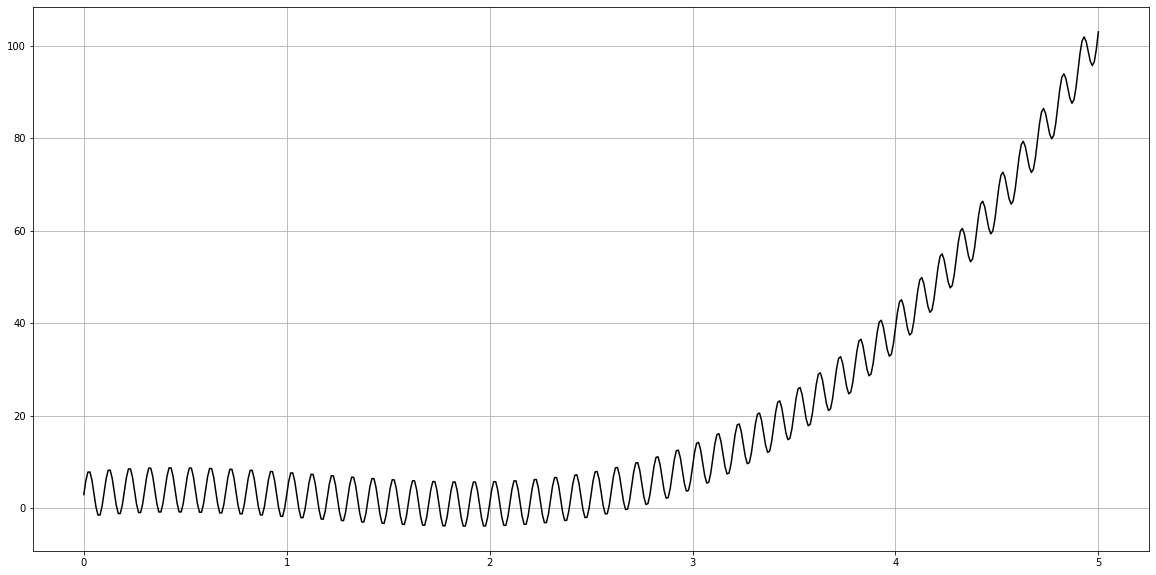

In [5]:
T = 5.
dt = .01
time = np.arange(0, T + dt, dt)
plt.grid(True)
plt.plot(time, data, color='k');

3. Побудуємо дискретне перетворення Фур'є:

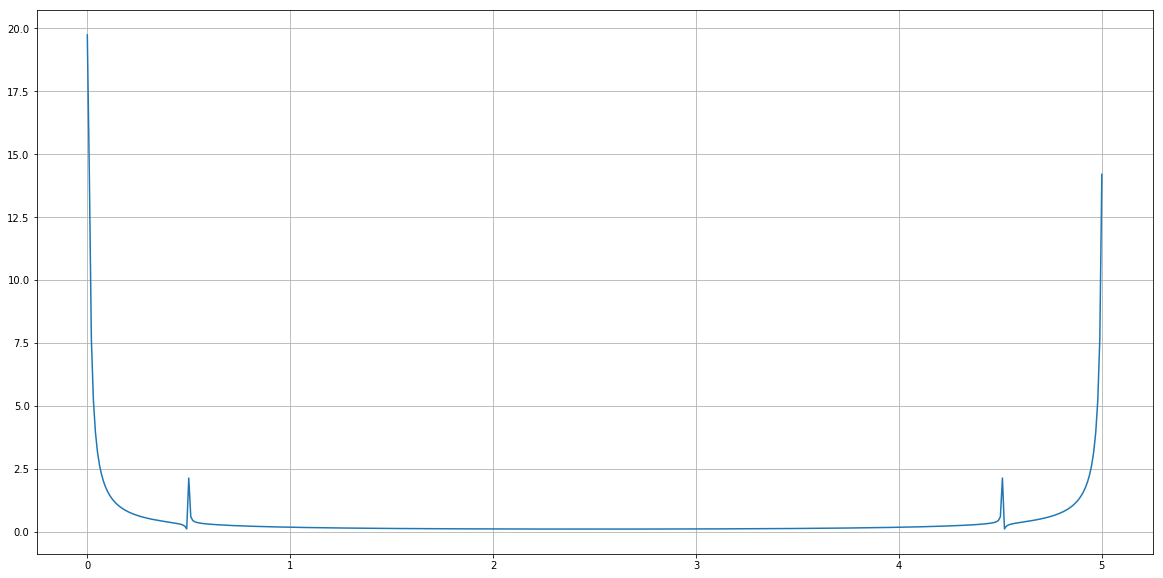

In [5]:
n = time.shape[0]
m = np.arange(n).reshape(n, 1).dot(np.arange(n).reshape(1, n))

frequency = np.sqrt(
    (data.dot(np.sin(2. * np.pi * m / n)) / n) ** 2 +
    (data.dot(np.cos(2. * np.pi * m / n)) / n) ** 2
)

plt.grid(True)
plt.plot(time, frequency, color='k');

4. Визначимо компоненту найбільшого впливу:

In [6]:
biggest_value = []

for i in range(3, n // 2):
    if np.max(frequency[i - 3:i + 4]) == frequency[i]:
        biggest_value.append(i)

main_frequency = biggest_value[0] / T
print(main_frequency)

10.0


5. Розв'яжемо систему рівнянь, де апроксимуємо суму синусів як синус найбільшого впливу перетворення Фур'є:

In [7]:
functions = np.vstack((time ** 3, time ** 2, time, np.sin(2. * np.pi * main_frequency * time), np.ones(n)))
solution = np.linalg.solve(functions.dot(functions.T), data.dot(functions.T))
print(solution)

[ 1.9999997  -6.99999792  4.99999726  5.00000122  3.        ]


6. Побудуємо отриманий нами поліном та порахуємо середньоквадратичну похибку:

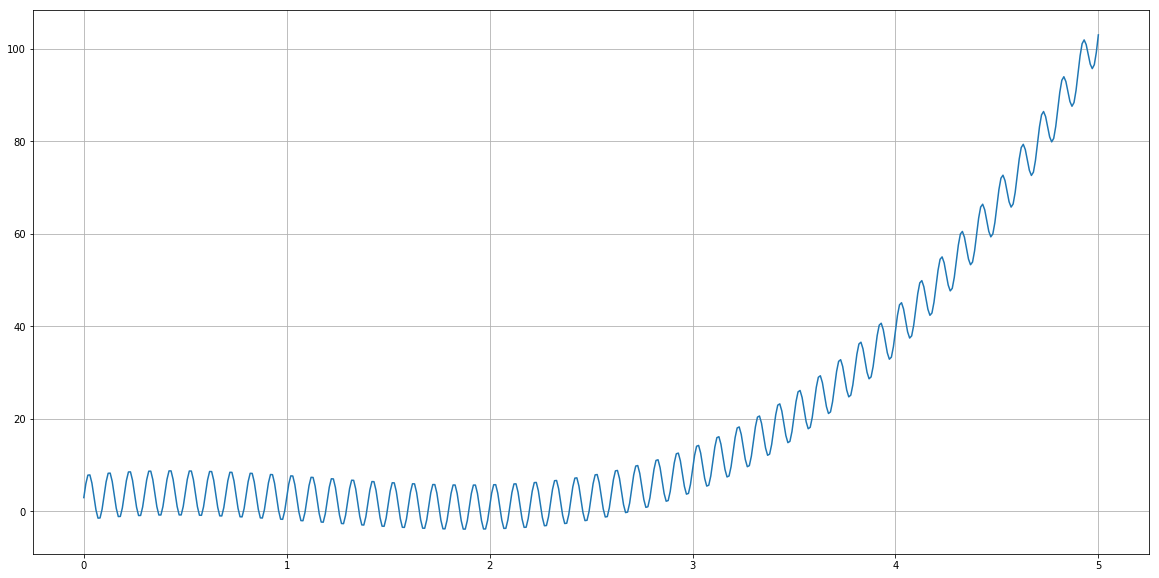

In [8]:
approximated_func = solution.dot(functions)
plt.grid(True)
plt.plot(time, approximated_func);

7. Обчислимо середньоквадратичне відхилення:

In [9]:
from sklearn.metrics import mean_squared_error

print("Mean squared error: ", mean_squared_error(data, approximated_func))

Mean squared error:  8.294413960661354e-10
